In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1. Метод k ближайших соседей.

In [52]:
from sklearn.datasets import make_classification
n_classes = 4
X, y = make_classification(n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, 
                           n_classes=n_classes, n_clusters_per_class=1)

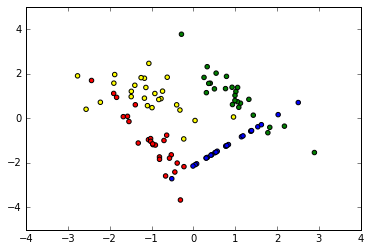

In [32]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'yellow', 'blue', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightyellow', 'lightblue','lightgreen'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [33]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [34]:
from sklearn.metrics import accuracy_score
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors=colors, light_colors=light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(accuracy_score(test_labels, estimator.predict(test_data))))
    plt.show()

In [54]:
from sklearn.cross_validation import cross_val_score, train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=.3)

k =  1


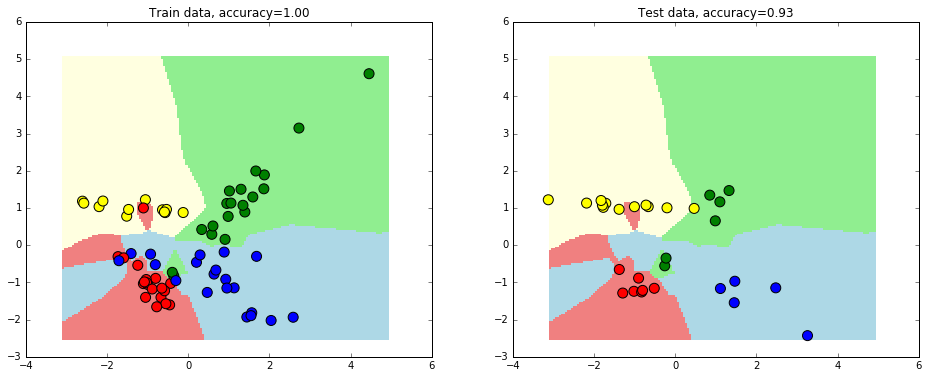

k =  2


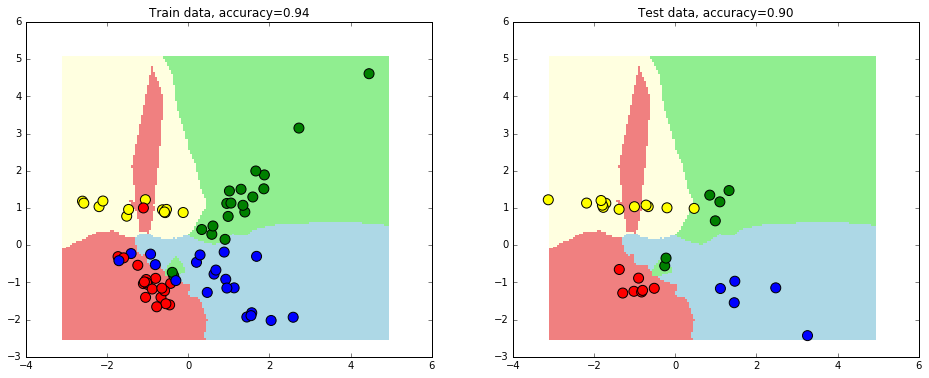

k =  3


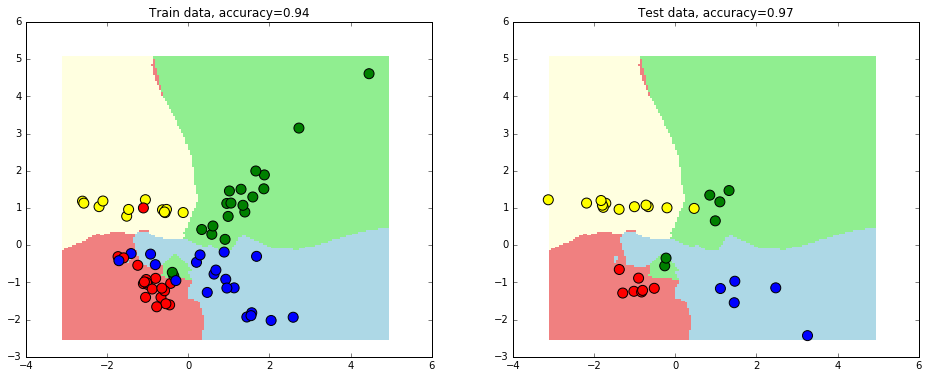

k =  5


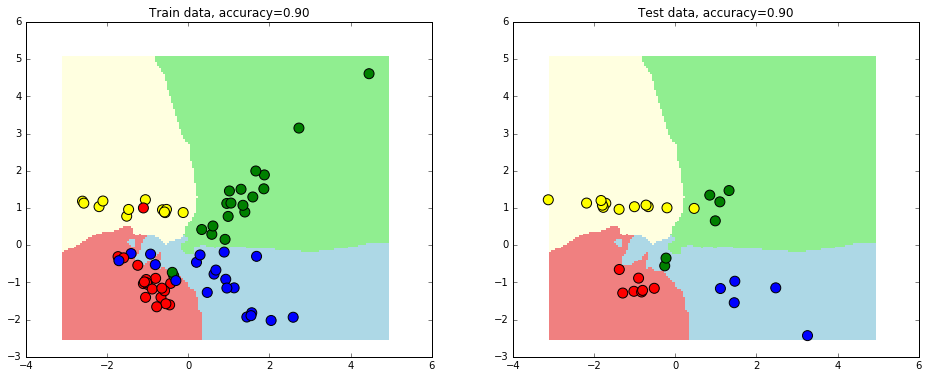

k =  10


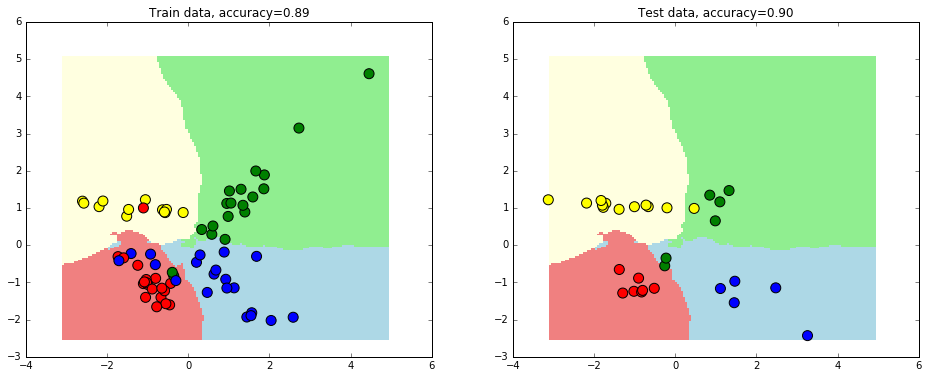

k =  30


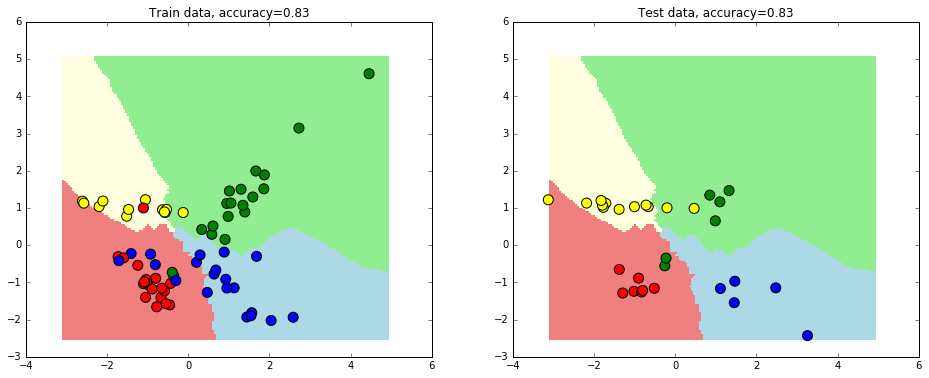

k =  50


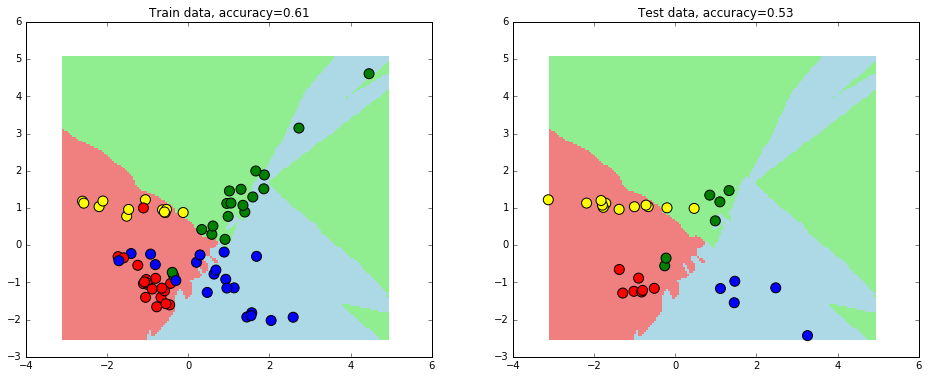

In [55]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1,2,3,5,10,30,50]
for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    print('k =  ' + str(k))
    plot_decision_surface(clf, train_data,train_labels,test_data,test_labels)

optimal k = 4


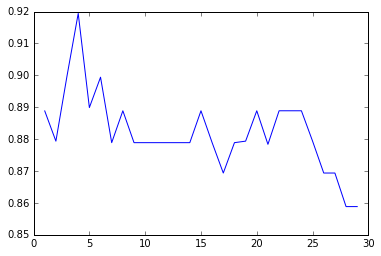

In [53]:
ks = np.arange(1, 30)
acc = []
for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    acc.append(cross_val_score(clf, X, y, scoring='accuracy', cv=5).mean())
plt.plot(ks, acc)
acc = np.array(acc)
print('optimal k =', np.argmax(acc) + 1)

Вообще, конечно, оптимальное k сильно зависит от выборки